In [445]:
import cv2
import numpy
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [446]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

detector_params = cv2.SimpleBlobDetector_Params()
detector_params.filterByArea = True
detector_params.maxArea = 100
detector_params.filterByCircularity = False
detector = cv2.SimpleBlobDetector_create(detector_params)
eye_detector = cv2.SimpleBlobDetector_create(detector_params)


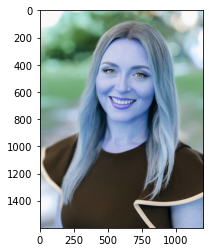

In [447]:
# img = cv2.imread('asian_female_headshot.jpg')
# img = cv2.imread('test-img.png')
# img = cv2.imread('headshot.jpeg')
# img = cv2.imread('black-man.jpeg')
img = cv2.imread('white-woman.jpeg')
plt.imshow(img)

In [448]:
from utils import detect_face_coords, detect_eyes_coords

face_coords = detect_face_coords(img, face_cascade)
fx, fy, fw, fh = face_coords
cv2.rectangle(img, (fx, fy), (fx + fw, fy + fh), (255, 255, 0), 2)

face_frame = img[fy : fy + fh, fx : fx + fw]
    
left_eye_coords, right_eye_coords = detect_eyes_coords(face_frame, eye_cascade)
lx, ly, lw, lh = left_eye_coords
rx, ry, rw, rh = right_eye_coords
cv2.rectangle(face_frame, (lx, ly), (lx + lw, ly + lh), (0, 225, 255), 2)
cv2.rectangle(face_frame, (rx, ry), (rx + rw, ry + rh), (0, 225, 255), 2)

left_eye_frame = face_frame[ly : ly + lh, lx : lx + lw]
right_eye_frame = face_frame[ry : ry + rh, rx : rx + rw]
eye_frames = [left_eye_frame, right_eye_frame]

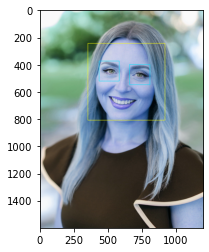

In [449]:
plt.imshow(img)

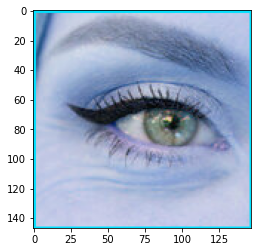

In [450]:
plt.imshow(eye_frames[0])

In [451]:
from utils import remove_eyebrows, find_eye_keypoints, find_best_threshold, shift_contour_inside_eye

for eye in eye_frames:
    eye = remove_eyebrows(eye)
    gray_frame = cv2.cvtColor(eye, cv2.COLOR_BGR2GRAY)
    gray_frame = cv2.GaussianBlur(gray_frame, (9, 9), 0)
    
    threshold = find_best_threshold(gray_frame)
    _, eye_img = cv2.threshold(gray_frame, threshold, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(eye_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[1:] # removes the window frame contour
    contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)
    
    largest_contour = contours[0]
    largest_contour = shift_contour_inside_eye(eye, largest_contour)
    contours[0] = largest_contour

    cv2.drawContours(eye, contours, 0, (0,255,0), 3)

plt.imshow(img)

ImportError: cannot import name 'shift_contour_for_makeup' from 'utils' (C:\Users\arisa\OneDrive\Desktop\Stanford\Junior\CS131\cs131-final-project\utils.py)

In [ ]:
plt.imshow(eye_frames[0])

In [ ]:
plt.imshow(eye_frames[1])